In [2]:
#NBVAL_IGNORE_OUTPUT
# Adding ignore due to (probably an np notebook magic) bug
import numpy as np
%matplotlib inline

# CREACIÓN DEL ESPACIO. vELOCIDAD Y CAPAS

Operator `initdamp` ran in 0.01 s


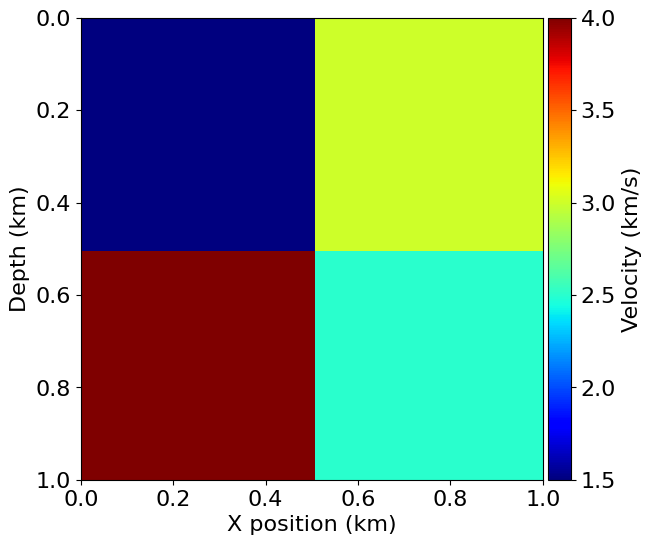

In [3]:
#NBVAL_IGNORE_OUTPUT
from examples.seismic import Model, plot_velocity

# Define a physical size
shape = (101, 101)  # Number of grid point (nx, nz)
spacing = (10., 10.)  # Grid spacing in m. The domain size is now 1km by 1km
origin = (0., 0.)  # What is the location of the top left corner. This is necessary to define
# the absolute location of the source and receivers

# Define a velocity profile. The velocity is in km/s
v = np.empty(shape, dtype=np.float32)
v[:, :51] = 1.5
v[51:, :] = 3
v[:, 51:] = 2.5
v[:51, 51:] = 4

# With the velocity and model size defined, we can create the seismic model that
# encapsulates this properties. We also define the size of the absorbing layer as 10 grid points
model = Model(vp=v, origin=origin, shape=shape, spacing=spacing,
              space_order=2, nbl=10, bcs="damp")

plot_velocity(model)

In [5]:
v.shape

(101, 101)

In [6]:
import numpy as np

# Generar una matriz de 101x101 con valores aleatorios entre 0 y 10
matriz = np.random.randint(0, 11, (101, 101))
matriz


array([[10,  4,  5, ..., 10,  4,  5],
       [ 6,  5,  9, ...,  6,  1,  0],
       [ 1,  9,  4, ...,  9,  0,  5],
       ...,
       [ 8,  0,  9, ..., 10,  3,  5],
       [ 5,  4,  6, ...,  8,  5,  6],
       [ 6,  7,  9, ...,  8,  4,  6]])

Operator `initdamp` ran in 0.01 s


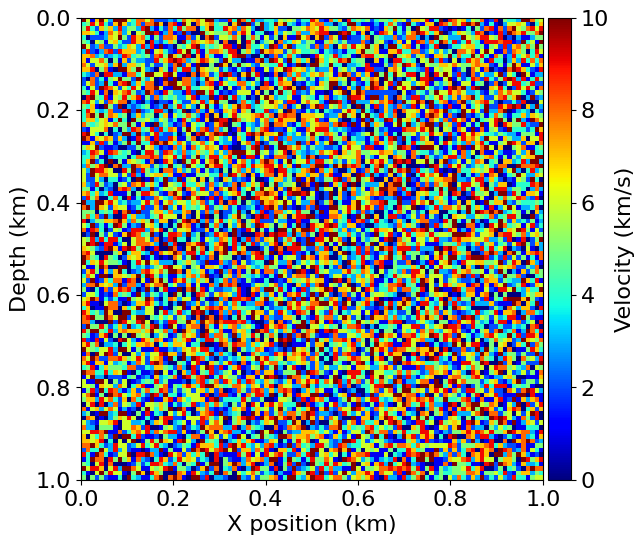

In [7]:
model = Model(vp=matriz, origin=origin, shape=shape, spacing=spacing,
              space_order=2, nbl=10, bcs="damp")

plot_velocity(model)

Operator `initdamp` ran in 0.01 s


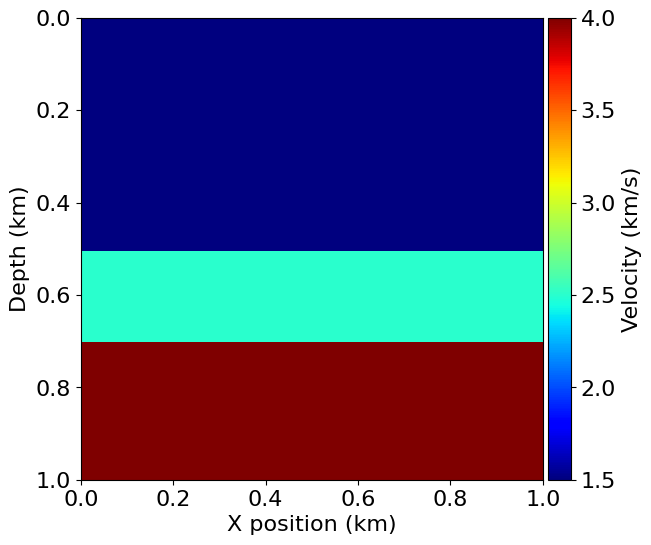

In [45]:
#NBVAL_IGNORE_OUTPUT
from examples.seismic import Model, plot_velocity

# Define a physical size
shape = (101, 101)  # Number of grid point (nx, nz)
spacing = (10., 10.)  # Grid spacing in m. The domain size is now 1km by 1km
origin = (0., 0.)  # What is the location of the top left corner. This is necessary to define
# the absolute location of the source and receivers

# Define a velocity profile. The velocity is in km/s
v = np.empty(shape, dtype=np.float32)
v[:, :51] = 1.5
v[:, 51:71] = 2.5
v[:, 71:] = 4

# With the velocity and model size defined, we can create the seismic model that
# encapsulates this properties. We also define the size of the absorbing layer as 10 grid points
model = Model(vp=v, origin=origin, shape=shape, spacing=spacing,
              space_order=2, nbl=10, bcs="damp")

plot_velocity(model)

In [46]:
v

array([[1.5, 1.5, 1.5, ..., 4. , 4. , 4. ],
       [1.5, 1.5, 1.5, ..., 4. , 4. , 4. ],
       [1.5, 1.5, 1.5, ..., 4. , 4. , 4. ],
       ...,
       [1.5, 1.5, 1.5, ..., 4. , 4. , 4. ],
       [1.5, 1.5, 1.5, ..., 4. , 4. , 4. ],
       [1.5, 1.5, 1.5, ..., 4. , 4. , 4. ]], dtype=float32)

In [4]:
model

# Geometría de adquisición

In [5]:
from examples.seismic import TimeAxis

t0 = 0.  # Simulation starts a t=0
tn = 1000.  # Simulation last 1 second (1000 ms)
dt = model.critical_dt  # Time step from model grid spacing

time_range = TimeAxis(start=t0, stop=tn, step=dt)

In [6]:
dt

np.float32(2.449)

In [7]:
time_range

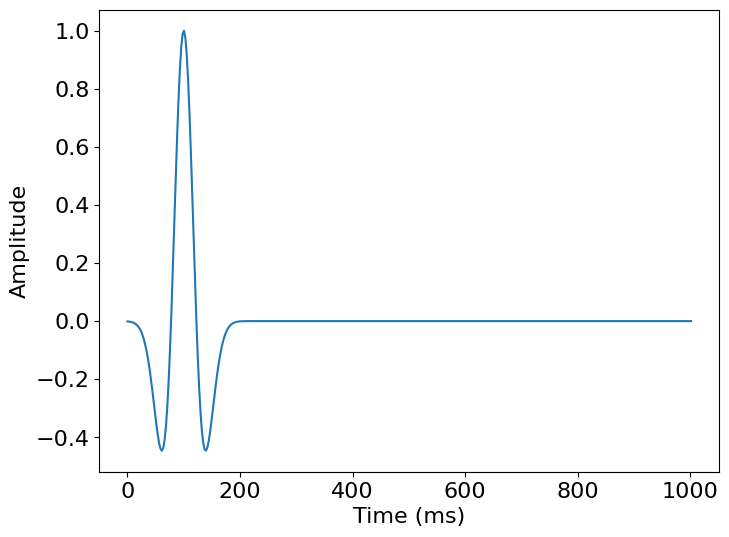

In [7]:
#NBVAL_IGNORE_OUTPUT
from examples.seismic import RickerSource

f0 = 0.010  # Source peak frequency is 10Hz (0.010 kHz)
src = RickerSource(name='src', grid=model.grid, f0=f0,
                   npoint=1, time_range=time_range)

# First, position source centrally in all dimensions, then set depth
src.coordinates.data[0, :] = np.array(model.domain_size) * .5
src.coordinates.data[0, -1] = 20.  # Depth is 20m

# We can plot the time signature to see the wavelet
src.show()

In [8]:
src.coordinates.data

Data([[500.,  20.]], dtype=float32)

In [9]:
model.domain_size

(np.float32(1000.0), np.float32(1000.0))

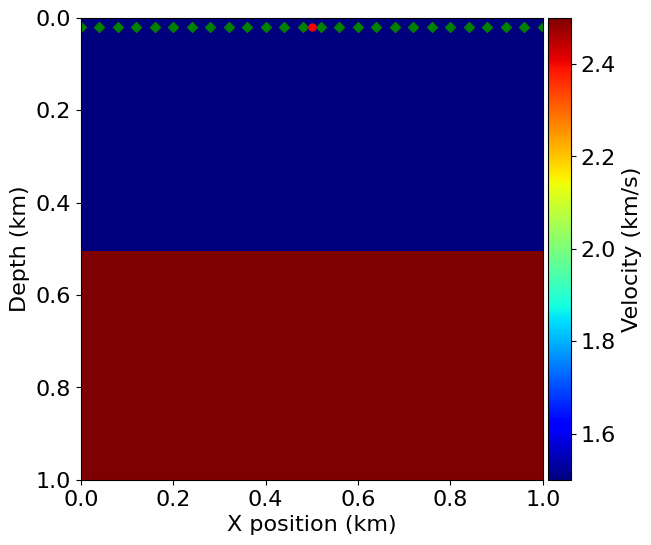

In [28]:
#NBVAL_IGNORE_OUTPUT
from examples.seismic import Receiver

# Create symbol for 101 receivers
rec = Receiver(name='rec', grid=model.grid, npoint=101, time_range=time_range)

# Prescribe even spacing for receivers along the x-axis
rec.coordinates.data[:, 0] = np.linspace(0, model.domain_size[0], num=101)
rec.coordinates.data[:, 1] = 20.  # Depth is 20m

# We can now show the source and receivers within our domain:
# Red dot: Source location
# Green dots: Receiver locations (every 4th point)
plot_velocity(model, source=src.coordinates.data,
              receiver=rec.coordinates.data[::4, :])

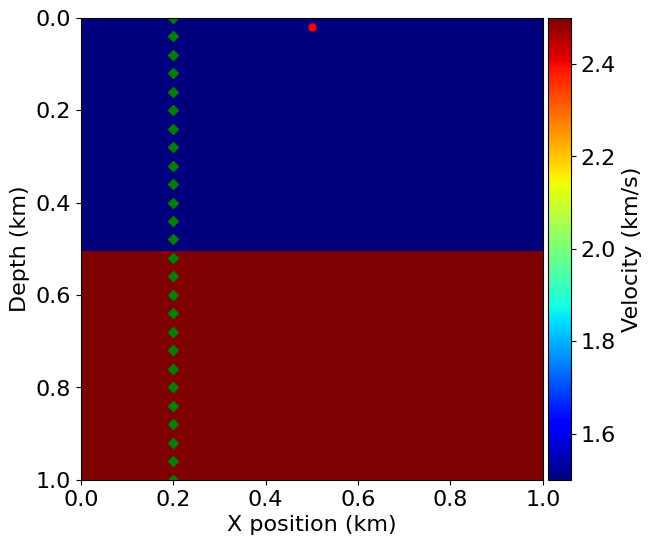

In [31]:
# Importar la clase Receiver del módulo seismic
from examples.seismic import Receiver

# Crear un símbolo para 101 receptores
rec = Receiver(name='rec', grid=model.grid, npoint=101, time_range=time_range)

# Prescribir un espaciamiento uniforme para los receptores a lo largo del eje y
rec.coordinates.data[:, 0] = 200.  # Posición fija en el eje x (puedes ajustar este valor según sea necesario)
rec.coordinates.data[:, 1] = np.linspace(0, model.domain_size[1], num=101)  # Espaciamiento uniforme a lo largo del eje y

# Mostrar la fuente y los receptores dentro del dominio:
# Punto rojo: Ubicación de la fuente
# Puntos verdes: Ubicación de los receptores (cada 4 puntos)
plot_velocity(model, source=src.coordinates.data,
              receiver=rec.coordinates.data[::4, :])


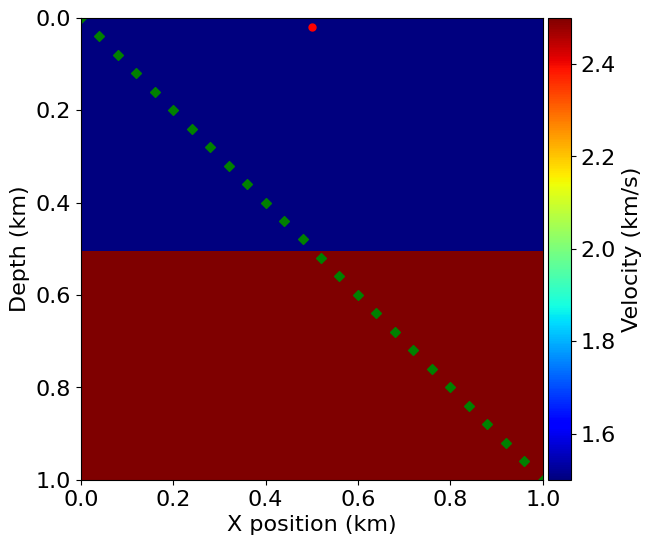

In [32]:
# Importar la clase Receiver del módulo seismic
from examples.seismic import Receiver

# Crear un símbolo para 101 receptores
rec = Receiver(name='rec', grid=model.grid, npoint=101, time_range=time_range)

# Prescribir un espaciamiento uniforme para los receptores a lo largo del eje y
rec.coordinates.data[:, 0] = np.linspace(0, model.domain_size[1], num=101)  # Posición fija en el eje x (puedes ajustar este valor según sea necesario)
rec.coordinates.data[:, 1] = np.linspace(0, model.domain_size[1], num=101)  # Espaciamiento uniforme a lo largo del eje y

# Mostrar la fuente y los receptores dentro del dominio:
# Punto rojo: Ubicación de la fuente
# Puntos verdes: Ubicación de los receptores (cada 4 puntos)
plot_velocity(model, source=src.coordinates.data,
              receiver=rec.coordinates.data[::4, :])

In [33]:
np.linspace(2.0, 3.0, num=5)

array([2.  , 2.25, 2.5 , 2.75, 3.  ])

In [34]:
np.linspace(2.0, 3.0, num=5, endpoint=False)

array([2. , 2.2, 2.4, 2.6, 2.8])

In [35]:
np.linspace(2.0, 3.0, num=5, retstep=True)

(array([2.  , 2.25, 2.5 , 2.75, 3.  ]), np.float64(0.25))

In [1]:
v.shape()

NameError: name 'v' is not defined